
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('../adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
m = data[data['sex'] == 'Male']
w = data[data['sex'] == 'Female']
print( 'male:', m.sex.count())
print('female:', w.sex.count())


print(len(data[data['sex'] == 'Male']))
print(len(data[data['sex'] == 'Female']))

male: 21790
female: 10771
21790
10771


**2. Каков средний возраст (признак *age*) женщин?**

In [4]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [7]:
ger = data[data['native-country'] == 'Germany'].count()
other = data[data['native-country'] != 'Germany'].count()

print(ger['native-country']/other['native-country'])


## Wrong ger/all

0.00422526523562793


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

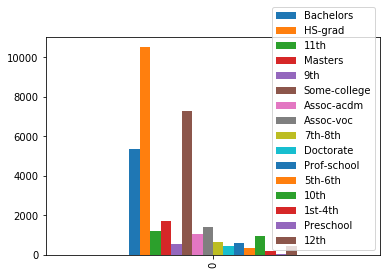

In [10]:
uniq_col = data.education.unique()
dic_col = {}

for col in uniq_col:
    n = data[data['education'] == col]
    dic_col[col] = [len(n)]

educ_df = pd.DataFrame(dic_col)

educ_df.plot.bar();

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [11]:
over50_age = data[data['salary'] == '>50K']['age']
under50_age = data[data['salary'] == '<=50K']['age']

print('over50:', over50_age.mean(), over50_age.std())
print('under50:', under50_age.mean(), under50_age.std())

over50: 44.24984058155847 10.519027719851826
under50: 36.78373786407767 14.02008849082488


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [12]:
over50 = data[data['salary'] == '>50K']
pd.crosstab(over50['salary'], data['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college
salary,,,,,,,,,,,,,,,
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,423,1387


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [286]:
data.groupby(['race']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


In [287]:
data.groupby(['sex']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


In [290]:
data[(data['sex'] == 'Male') & (data['race'] == 'Amer-Indian-Eskimo')]['age'].max()

82

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [360]:
maried = data[data['marital-status'].map(lambda x: 'Married' in x)]
unmaried = data[data['marital-status'].map(lambda x: 'Married' not in x)]

print('maried', maried[maried['salary'] == '>50K'].count()[0])
print('unmaried', unmaried[unmaried['salary'] == '>50K'].count()[0])

maried 6736
unmaried 1105


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [418]:
hpw_max = data['hours-per-week'].max()
print('hours per week max:', hpw_max)

hpw_max_people = data[data['hours-per-week'] == hpw_max]
print('hours per week max work,  people:', len(hpw_max_people))

hpw_max_over50k = hpw_max_people[hpw_max_people['salary'] == '>50K']
print('over 50K:', 
        len(hpw_max_over50k)/len(hpw_max_people))

hours per week max: 99
hours per week max work,  people: 85
over 50K: 0.29411764705882354


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [408]:
over50k = data[data['salary'] == '>50K']
under50k = data[data['salary'] == '<=50K']

print('over 50k hours work mean:', over50k['hours-per-week'].mean())
print('under 50k  hours work mean:', under50k['hours-per-week'].mean())

over50k.groupby(['native-country'])['hours-per-week'].mean()

over 50k hours work mean: 45.473026399693914
under 50k  hours work mean: 38.840210355987054


native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500000
Ireland               48.000000
Italy                 45.400000
Jamaica               41.100000
Japan                 47.958333
Laos                  40.000000
Mexico                46.575758
Nicaragua             37.500000
Peru                  40.000000
Philippines           43.032787
Poland                39.000000
Portugal              41.

In [406]:
under50k.groupby(['native-country'])['hours-per-week'].mean()

native-country
?                             40.164760
Cambodia                      41.416667
Canada                        37.914634
China                         37.381818
Columbia                      38.684211
Cuba                          37.985714
Dominican-Republic            42.338235
Ecuador                       38.041667
El-Salvador                   36.030928
England                       40.483333
France                        41.058824
Germany                       39.139785
Greece                        41.809524
Guatemala                     39.360656
Haiti                         36.325000
Holand-Netherlands            40.000000
Honduras                      34.333333
Hong                          39.142857
Hungary                       31.300000
India                         38.233333
Iran                          41.440000
Ireland                       40.947368
Italy                         39.625000
Jamaica                       38.239437
Japan                    